## qflib Library Examples

In [8]:
import qflib as qf
import numpy as np
import os
import matplotlib.pyplot as plt
print("qflib version: {0}".format(qf.version()))
print("pid: {0}".format(os.getpid()))

qflib version: 0.4.0-debug
pid: 4260


In [2]:
name = "World"
print(qf.sayHello(name))

Hello World!


In [3]:
x = [1, 2, 3]
y = [4, 5]
op = qf.outerProd(x, y)
print(f'x: {x}\ny: {y}')
print(f'outerProd:\n{op}')

x: [1, 2, 3]
y: [4, 5]
outerProd:
[[ 4.  5.]
 [ 8. 10.]
 [12. 15.]]


### Analytic Prices

In [4]:
#fwdprice
fwdpx = qf.fwdPrice(spot = 100, timetoexp = 1.0, intrate = 0.02, divyield = 0.04)
print('Forward price analytic solution')
print(f'Price={fwdpx:.4f}')

Forward price analytic solution
Price=98.0199


In [5]:
#digibs
digi = qf.digiBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.2)
print('Digital option using Black-Scholes analytic solution')
print(f'Price={digi:.4f}')

Digital option using Black-Scholes analytic solution
Price=0.4124


In [6]:
euro = qf.euroBS(payofftype = 1, spot = 100, timetoexp = 1.0, strike = 100,
                  intrate = 0.02, divyield = 0.04, volatility = 0.4)
print('European option using Black-Scholes analytic solution')
print(f'Price={euro:.4f}')

European option using Black-Scholes analytic solution
Price=14.4327


# # Problem 2: Knockout Forward Implementation and python example

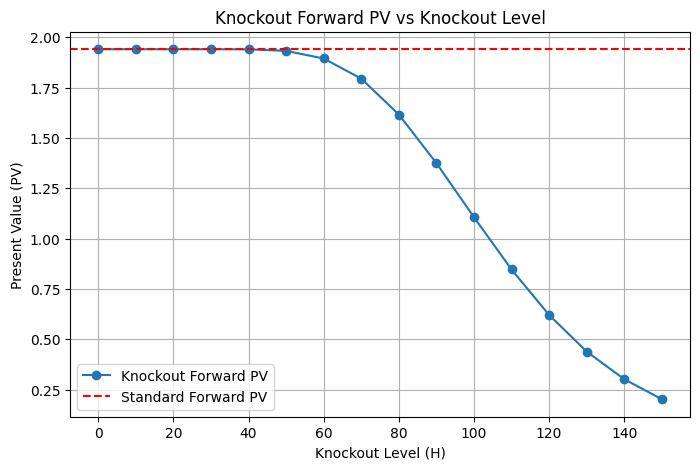

The standard forward price (without knockout) is 1.9409, and remains constant.


In [9]:
# parameters
S = 100   # Spot 
K = 100   # Strike 
T = 1     # Time to expiration
T1 = 0.5  # Time to knockout
r = 0.04  # 
q = 0.02  # 
sigma = 0.40  # Volatility 

# range of knockout levels
H_values = np.arange(0, 151, 10)

# knockout forward values
knockout_values = [qf.koFwd(S, K, H, T, T1, r, q, sigma) for H in H_values]

# standard forward price (if no knockout occurs)
standard_forward = np.exp(-r * T) * (S * np.exp((r - q) * T) - K)

# results
plt.figure(figsize=(8, 5))
plt.plot(H_values, knockout_values, label="Knockout Forward PV", marker='o')
plt.axhline(standard_forward, color='r', linestyle='dashed', label="Standard Forward PV")
plt.xlabel("Knockout Level (H)")
plt.ylabel("Present Value (PV)")
plt.title("Knockout Forward PV vs Knockout Level")
plt.legend()
plt.grid()
plt.show()
print(f"The standard forward price (without knockout) is {standard_forward:.4f}, and remains constant.")

# Interpretation
The knockout forward value decreases as the knockout level H increases, because the probability of getting knocked out becomes higher. The standard forward price (without knockout) is 1.9409, and remains constant.

# # Problem 3: Capped Forward Contract

## Part (a): Expressing the Capped Forward in Terms of Fixed Cash Payments and European Options
A **capped forward contract** is similar to a standard forward contract but has an **upper limit \( K_2 \)** on the payoff. 

###  Payoff of a Standard Forward Contract
A **standard forward contract** pays at **maturity \( T \)**:

$$ \text{Payoff} = S_T - K_1 $$

This is a **linear payoff** that increases as \( S_T \) increases.

A **capped forward contract** places an **upper cap \( K_2 \)** on the payoff:

$$ \text{Payoff} = \min(K_2, S_T - K_1) $$

Using the **payoff decomposition formula** from the lecture notes:

$$ \min(c, x) = c - (c - x)^+ $$

Setting:
- \( c = K_2 \) (cap)
- \( x = S_T - K_1 \) (standard forward payoff),

we get:

$$ \text{Capped Forward Payoff} = K_2 - (K_2 - (S_T - K_1))^+ $$

Rewriting:

$$ \text{Capped Forward Payoff} = (S_T - K_1) - (S_T - K_2)^+ $$

From the above equation, we can see that the **capped forward contract** consists of:
1. **A standard forward contract** \( (S_T - K_1) \).
2. **A short position in a European call option** with strike \( K_2 \), because \( (S_T - K_2)^+ \) is the payoff of a call option.

Thus, the **capped forward contract can be written as**:

$$ \text{Capped Forward PV} = \text{Standard Forward PV} - \text{Call Option Price}(K_2) $$

This means:
- The **forward contract component** allows participation in price movements **above \( K_1 \)**.
- The **short call at \( K_2 \)** limits the upside, ensuring that the total payoff **cannot exceed \( K_2 \)**.

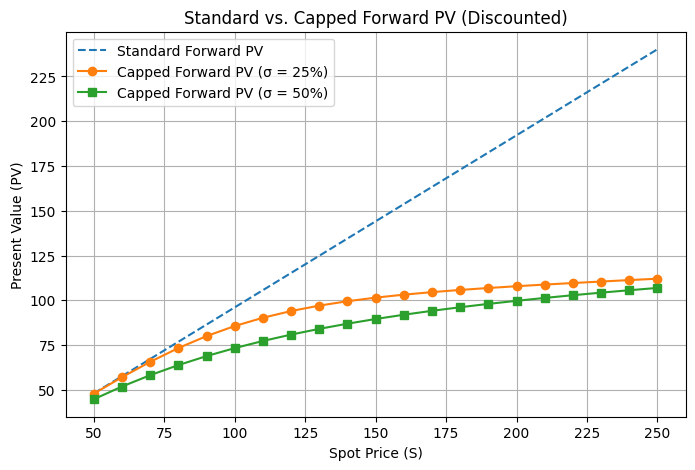

In [10]:
#Part(b)
# Parameters
K1 = 100  # Strike
K2 = 110  # Cap
T = 2     # Time in years
r = 0.04  
q = 0.02  
sigma_25 = 0.25  # Volatility 25%
sigma_50 = 0.50  # Volatility 50%

# range of Spot Prices
spot_values = np.arange(50, 251, 10)

# Standard Forward Prices (applying Discounting)
standard_fwd_prices = [np.exp(-r * T) * qf.fwdPrice(S, T, r, q) for S in spot_values]

# Capped Forward Prices using Decomposition
capped_fwd_prices_25 = [np.exp(-r * T) * (qf.fwdPrice(S, T, r, q) - qf.euroBS(1, S, K2, T, r, q, sigma_25)) for S in spot_values]
capped_fwd_prices_50 = [np.exp(-r * T) * (qf.fwdPrice(S, T, r, q) - qf.euroBS(1, S, K2, T, r, q, sigma_50)) for S in spot_values]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(spot_values, standard_fwd_prices, label="Standard Forward PV", linestyle='dashed')
plt.plot(spot_values, capped_fwd_prices_25, label="Capped Forward PV (σ = 25%)", marker='o')
plt.plot(spot_values, capped_fwd_prices_50, label="Capped Forward PV (σ = 50%)", marker='s')
plt.xlabel("Spot Price (S)")
plt.ylabel("Present Value (PV)")
plt.title("Standard vs. Capped Forward PV (Discounted)")
plt.legend()
plt.grid()
plt.show()

# Interpretation
PV of the standard forward contract increases linearly with the spot price. However, K2 limits the capped forward contract. From the payoff decomposition we can see that PV of the capped forward rises with increase with increase in PV of standard forward or decrease in price(PV) of call of option. At higher volatility, the call option price rises. Therefore, the capped forward value decreases because the probability of the spot exceeding K2 increases, which makes the call option more expensive.